In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_df = pd.read_csv(ride_data_to_load)
city_df = pd.read_csv(city_data_to_load)

#list(city_df)
#list(ride_df)
#print(city_df.dtypes)
#print(ride_df.dtypes)

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
merge_df.head(30)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


## Bubble Plot of Ride Sharing Data

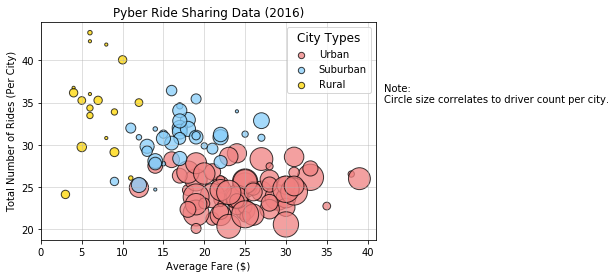

In [2]:
# Obtain the x and y coordinates for each of the three city types
rural_df = merge_df.loc[merge_df['type'] == "Rural"]
suburban_df = merge_df.loc[merge_df['type'] == "Suburban"]
urban_df = merge_df.loc[merge_df['type'] == "Urban"]

rural_groupby_city = rural_df.groupby(['city'])
suburban_groupby_city = suburban_df.groupby(['city'])
urban_groupby_city = urban_df.groupby(['city'])

# x_axis
rural_rides_per_city = rural_groupby_city.ride_id.count()
suburban_rides_per_city = suburban_groupby_city.ride_id.count()
urban_rides_per_city = urban_groupby_city.ride_id.count()


# Data: Average Fare
rural_total_fares_per_city = rural_groupby_city.fare.sum()
suburban_total_fares_per_city = suburban_groupby_city.fare.sum()
urban_total_fares_per_city = urban_groupby_city.fare.sum()

rural_avg_fare_per_city = rural_total_fares_per_city / rural_rides_per_city
suburban_avg_fare_per_city = suburban_total_fares_per_city / suburban_rides_per_city
urban_avg_fare_per_city = urban_total_fares_per_city / urban_rides_per_city


# Bubble size
city_df = city_df.set_index(['city'])
city_sorted_df = city_df.sort_index()

rural_city_df = city_sorted_df.loc[city_sorted_df['type'] == "Rural"]
suburban_city_df = city_sorted_df.loc[city_sorted_df['type'] == "Suburban"]
urban_city_df = city_sorted_df.loc[city_sorted_df['type'] == "Urban"]

rural_bubble_sizes = rural_city_df['driver_count'] * 10
suburban_bubble_sizes = suburban_city_df['driver_count'] * 10
urban_bubble_sizes = urban_city_df['driver_count'] * 10

# Plot it
urban_handle = plt.scatter(urban_rides_per_city, urban_avg_fare_per_city, marker="o", c='lightcoral', edgecolors="black", s=urban_bubble_sizes, alpha=0.75, label="Urban")
suburban_handle = plt.scatter(suburban_rides_per_city, suburban_avg_fare_per_city, marker="o", c='lightskyblue', edgecolors="black", s=suburban_bubble_sizes, alpha=0.75, label="Suburban")
rural_handle = plt.scatter(rural_rides_per_city, rural_avg_fare_per_city, marker="o", c='gold', edgecolors="black", s=rural_bubble_sizes, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.ylim(18.75, 44.5)
plt.xlim(0, 41)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
lgnd.set_title("City Types", prop = {'size':'large'})

# Incorporate a text label regarding circle size
plt.text(x=42, y=35, s='Note:\nCircle size correlates to driver count per city.')

# Save Figure
plt.savefig("pyber_scatter_plot.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'Fares by City Type')

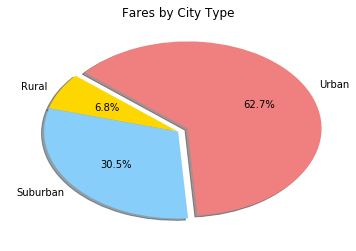

In [4]:
# Calculate Driver Percents
# total Fares
total_fares = merge_df['fare'].sum()
# fares per type
groupedby_type = merge_df.groupby('type')
fares_per_type = groupedby_type.fare.sum()
percent_fares_per_type = (fares_per_type * 100) / total_fares


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [6.8, 30.5, 62.7]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.08)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("pyber_pie_total_fares_per_type.png")

# Title
plt.title('Fares by City Type')

# Make it a circle
#plt.axis("equal")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'Rides by City Type')

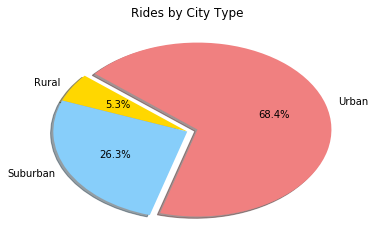

In [6]:
# Calculate Type Percents
# total rides
total_rides = merge_df['ride_id'].count()
# rides per type
groupedby_type = merge_df.groupby('type')
rides_per_type = groupedby_type.ride_id.count()
percent_rides_per_type = (rides_per_type * 100) / total_rides


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [5.3, 26.3, 68.4]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.08)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("pyber_pie_total_rides_per_type.png")

# Title
plt.title('Rides by City Type')

# Make it a circle
#plt.axis("equal")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'Drivers by City Type')

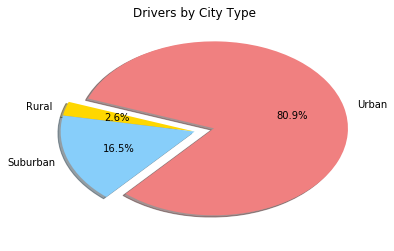

In [8]:

# drivers per type
rural_drivers = rural_city_df['driver_count'].sum()
suburban_drivers = suburban_city_df['driver_count'].sum()
urban_drivers = urban_city_df['driver_count'].sum()

# total drivers
total_drivers = rural_drivers + suburban_drivers + urban_drivers

rural_rides_percent = (rural_drivers * 100) / total_drivers
suburban_rides_percent = (suburban_drivers * 100) / total_drivers
urban_rides_percent = (urban_drivers * 100) / total_drivers

# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [2.6, 16.5, 80.9]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.15)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.savefig("pyber_pie_total_drivers_per_type.png")

# Title
plt.title('Drivers by City Type')

# Make it a circle
#plt.axis("equal")

In [9]:
# Show Figure
plt.show()